In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Read csv dataset
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,0.365189,0.913321,-0.000048,0.258454,0.861283,-0.043181,0.194499,0.746194,-0.064417,0.155975,...,0.538812,0.564697,-0.078034,0.557185,0.494742,-0.104639,0.569282,0.431587,-0.120646,5
1395,0.367605,0.912403,-0.000077,0.262845,0.862648,-0.047770,0.197502,0.746475,-0.073227,0.157734,...,0.541223,0.558874,-0.084517,0.559582,0.489903,-0.111754,0.571296,0.426247,-0.127432,5
1396,0.371403,0.904854,-0.000041,0.269489,0.851166,-0.050308,0.204487,0.734565,-0.079571,0.162562,...,0.544740,0.554054,-0.105242,0.563713,0.487231,-0.134153,0.576565,0.426054,-0.150451,5
1397,0.375132,0.906096,-0.000089,0.274048,0.852090,-0.051182,0.208373,0.737115,-0.079401,0.169681,...,0.550963,0.555935,-0.102731,0.570902,0.488152,-0.130316,0.583927,0.426189,-0.144401,5


In [13]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,0.365189,0.913321,-0.000048,0.258454,0.861283,-0.043181,0.194499,0.746194,-0.064417,0.155975,...,0.538812,0.564697,-0.078034,0.557185,0.494742,-0.104639,0.569282,0.431587,-0.120646,5
1395,0.367605,0.912403,-0.000077,0.262845,0.862648,-0.047770,0.197502,0.746475,-0.073227,0.157734,...,0.541223,0.558874,-0.084517,0.559582,0.489903,-0.111754,0.571296,0.426247,-0.127432,5
1396,0.371403,0.904854,-0.000041,0.269489,0.851166,-0.050308,0.204487,0.734565,-0.079571,0.162562,...,0.544740,0.554054,-0.105242,0.563713,0.487231,-0.134153,0.576565,0.426054,-0.150451,5
1397,0.375132,0.906096,-0.000089,0.274048,0.852090,-0.051182,0.208373,0.737115,-0.079401,0.169681,...,0.550963,0.555935,-0.102731,0.570902,0.488152,-0.130316,0.583927,0.426189,-0.144401,5


In [14]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (1399, 63)
Labels shape = (1399,)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [16]:
y_pred = svm.predict(x_test)
y_pred

array([2, 2, 4, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 4, 2, 5,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2,
       4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 5, 2, 2, 5, 2, 2, 5, 2, 2, 5, 5, 5, 2, 4, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2,
       4, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 4, 2,
       2, 2, 5, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 5, 4, 2, 2, 2, 2, 5,
       2, 3, 2, 5, 2, 2, 2, 5, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int64)

In [17]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.35, 0.35, 0.35)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

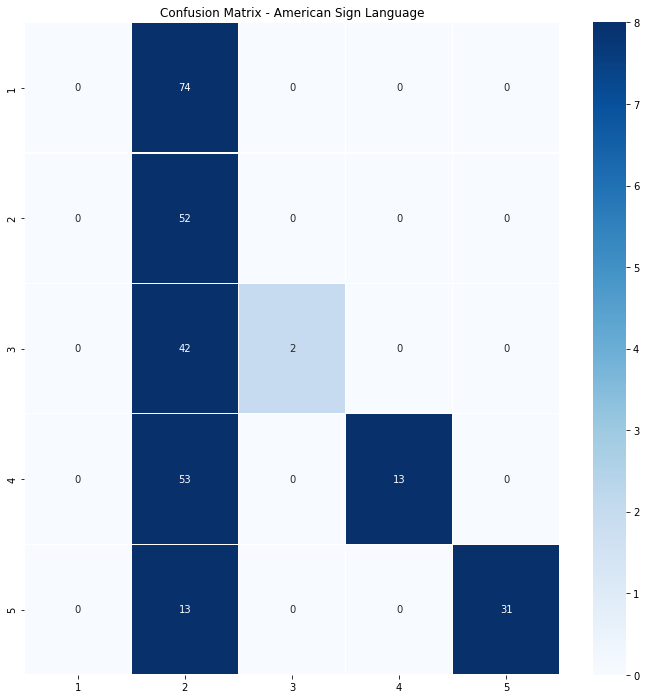

In [21]:
labels = sorted(list(set(df['Output'])))
labels = [x for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [22]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)